# Predicting Toronto Ferry Activity

In [1]:
from Model import RedemptionModel 
import pandas as pd 

In [2]:
def load_data(file):
    # generic data processing function
    df = pd.read_csv(file,
                dtype={'_id':int, 'Redemption Count': int, 'Sales Count':int},
                parse_dates=['Timestamp'])
    df.sort_values('Timestamp', inplace=True)
    # convert to time-aware
    df.set_index('Timestamp', inplace=True)
    df_daily = df.resample('d').sum()
    # engineer some time features 
    df_daily['monthly'] = df_daily.reset_index().Timestamp.dt.month.values
    df_daily['quarter'] = df_daily.reset_index().Timestamp.dt.quarter.values
    return df_daily

In [3]:
df = load_data('./data/Toronto Island Ferry Ticket Counts.csv')

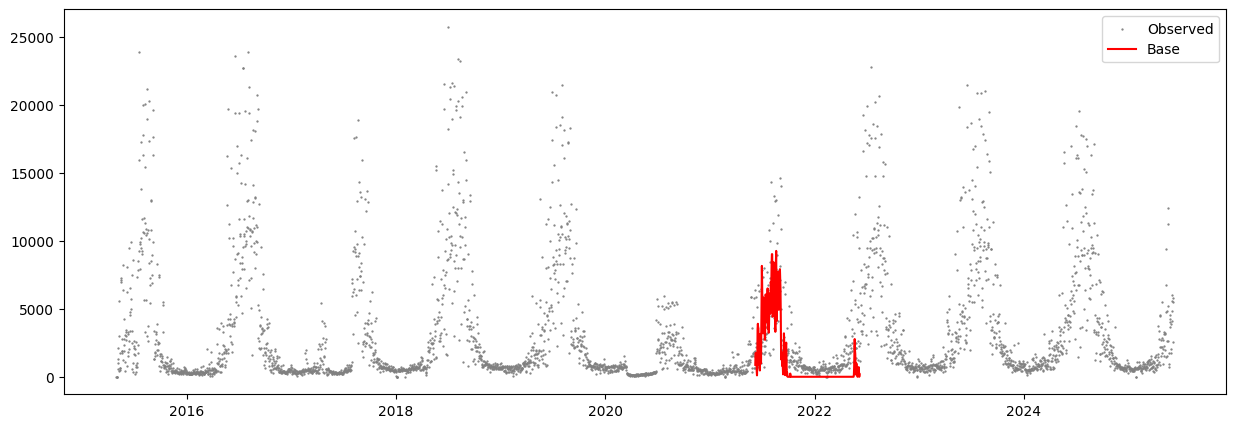

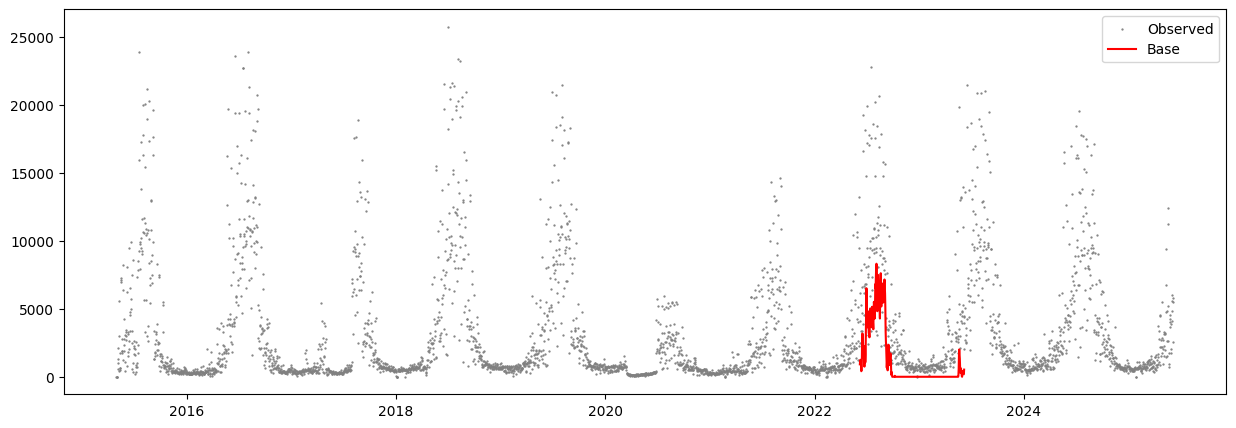

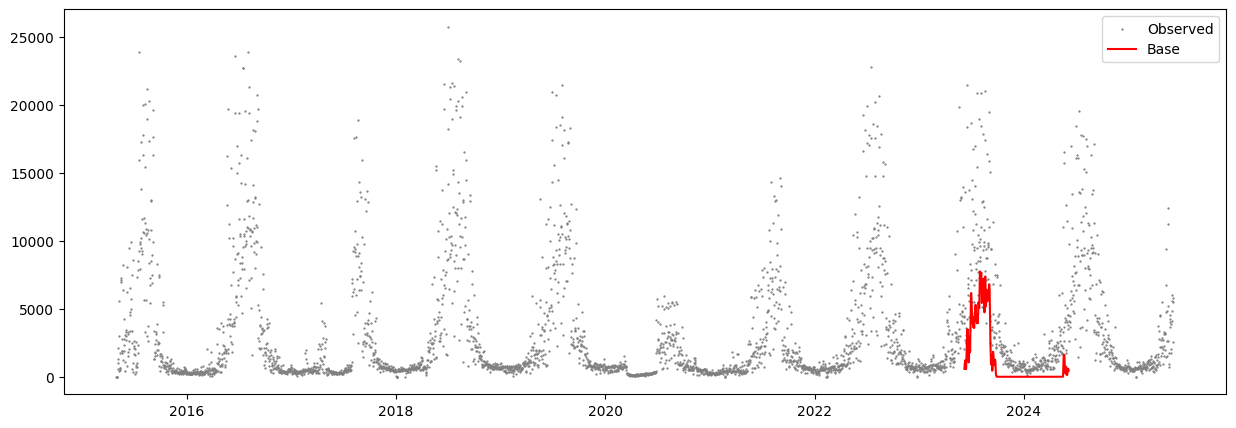

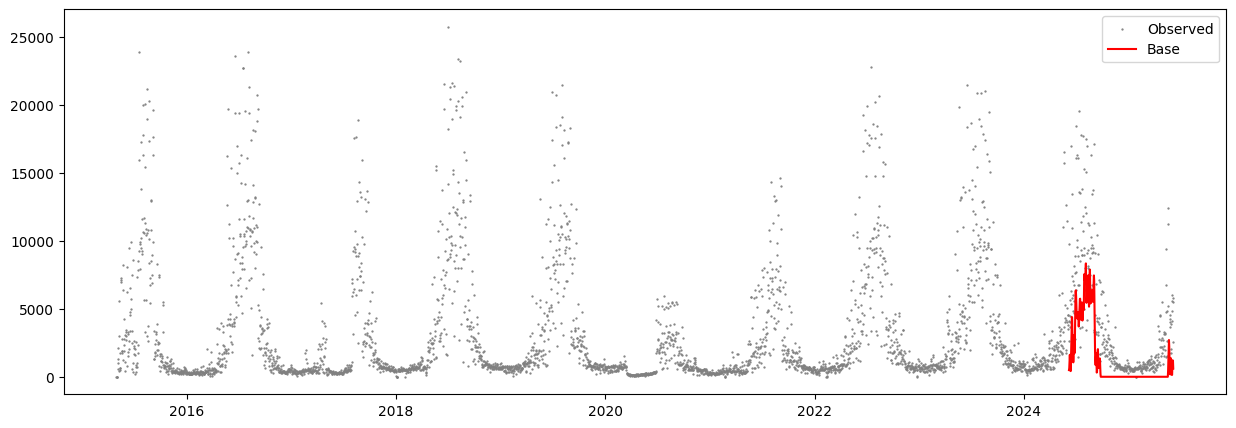

In [4]:
rm = RedemptionModel(df, 'Redemption Count')
rm.run_models()

In [5]:
def average_performance(results):
    for model, splits in results.items():
        metrics = list(next(iter(splits.values())).keys())
        avg_metrics = {metric: 0 for metric in metrics}
        for split in splits.values():
            for metric in metrics:
                avg_metrics[metric] += split[metric]
        for metric in metrics:
            avg_metrics[metric] /= len(splits)
        print(f"{model}:")
        for metric, avg in avg_metrics.items():
            print(f"  {metric}: {avg:.4f}")

average_performance(rm.results)

Base:
  MAPE: 0.8652
  MAE: 2468.6425
  MSE: 14659607.3346
